In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

* tenemos que seleccionar los k means
* la funcion busca minizar el cuadrado de las distancias de los clusteres

El algoritmo de clustering más usado es K-Means. Tiene una muy buena escalabilidad con la cantidad de datos. Para utilizar K-Means debemos especificar el número de grupos que queremos encontrar. A este número de grupos se le denomina K.

El algoritmo K-Means sigue los siguientes pasos:

* Inicialización: se elige la localización de los centroides de los K grupos aleatoriamente
* Asignación: se asigna cada dato al centroide más cercano
* Actualización: se actualiza la posición del centroide a la media aritmética de las posiciones de los datos asignados al grupo

Los pasos 2 y 3 se siguen iterativamente hasta que no haya más cambios.

https://www.iartificial.net/clustering-agrupamiento-kmeans-ejemplos-en-python/

Scikit-learn ofrece la siguiente tabla que nos ayuda a comparar los diferentes algoritmos de clustering. La comparación de los algoritmos de clustering está hecha en función a los parámetros que necesitan, su escalabilidad, caso de uso y geometría (métrica usada). Algunas preguntas útiles pueden ser:

¿Tengo una idea del número de grupos que quiero encontrar? … ¿o prefiero que el algoritmo lo encuentre?
¿Tengo muchísimos datos? En este caso, deberemos tener en cuenta la escalabilidad del algoritmo.

https://scikit-learn.org/stable/modules/clustering.html

* Ejercicio muy bueno para ver el modelo

https://www.kaggle.com/kashnitsky/a7-demo-unsupervised-learning-solution

In [3]:
data = np.random.random(90).reshape(30,3)

In [4]:
# tenemos que definir primero los centroides, de forma aleatoria, y depues el proceso es como vimos antes en la matriz de distancia (los datos se van modificando en funcion de la pertenencia a un cluster hasta que solo quede uno )
# primero seleccionamos dos datos de forma aleatoria
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))
# ahora definimos los centros del cluster
clust_centers = np.vstack([data[c1],data[c2]])
clust_centers

array([[0.33501241, 0.0264529 , 0.04461503],
       [0.82908975, 0.37132724, 0.80328085]])

In [5]:
# ahora ya podemos implatar el modelo
from scipy.cluster.vq import vq

# con vq vemos la visualizacion de pertenencia
vq(data,clust_centers) # en el primer array nos dice a que cluster pertenece; el segundo nos dice la distancia de las observaciones del varicentro del cluster (ejemplo el primer dato seria el propio varicentro , el segundo esta a 0.8 del cluster 1...)

(array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 1]),
 array([0.        , 0.36795204, 0.29748227, 0.45077715, 0.58576599,
        0.37950787, 0.79161398, 0.63813094, 0.26311665, 0.39637763,
        0.72353219, 0.4346772 , 0.39256317, 0.47219817, 0.21451923,
        0.35547651, 0.49084111, 0.8506365 , 0.42272624, 0.65078365,
        0.57293403, 0.87121032, 0.45670743, 0.13439043, 0.47054056,
        0.40492921, 0.3542091 , 0.46715658, 0.        , 0.49746998]))

In [6]:
# con kmeans nos dice la informacion de los varicentros
from scipy.cluster.vq import kmeans
kmeans(data,clust_centers) # vemos los dos varicentros de los dos clusters; el numero final es la suma del cuadrado de los errores (0.377)

(array([[0.37333223, 0.21630032, 0.18392126],
        [0.60423351, 0.42836839, 0.60791427]]), 0.3755295742736183)

In [7]:
# tambien podemos hacer lo mismo pero sin decirle la posicion de los centroides, ya que lo hace directamente; solo indicando el numero
kmeans(data,2)

(array([[0.75912455, 0.30906182, 0.527554  ],
        [0.23720454, 0.48362188, 0.48112541]]), 0.3467652076928197)

### Ejercicio: segmentacion de los vinos

In [8]:
url = r"https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/wine/winequality-red.csv"
df = pd.read_csv(url,sep=";")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

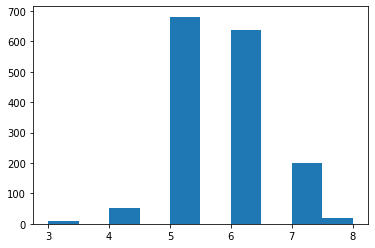

In [9]:
plt.hist(df["quality"])

In [10]:
# vemos  un resumen segun la calidad
# vemos por ejemplo que la volatildad tiene una corr negativa, asi como el cloro
# los sulfatos influyen positivamente, asi como los citricos
# dos que no pintan nada son la densidad y el azucar
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [11]:
# primeros tenemos que normalizar los datos
df_norma = (df-df.min()) / (df.max()-df.min())
df_norma.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4


In [12]:
# clustering jerarquico
from sklearn.cluster import AgglomerativeClustering
# primero creamos los clusteres
clus = AgglomerativeClustering(n_clusters=6,linkage="ward").fit(df_norma)


Text(0, 0.5, 'frecuencia')

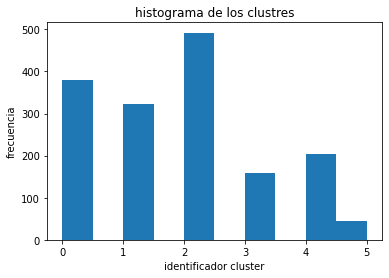

In [13]:
# creamos una serie con sus clusteres para representarlos
nd = pd.Series(clus.labels_)
plt.hist(nd)
plt.title("histograma de los clustres")
plt.xlabel("identificador cluster")
plt.ylabel("frecuencia")

In [14]:
# aqui podemos ver la estructura de los "hijos"
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [15]:
# podemos pintar un dendograma
from scipy.cluster.hierarchy import dendrogram,linkage
Z = linkage(df_norma,"ward")

Text(0, 0.5, 'distancia')

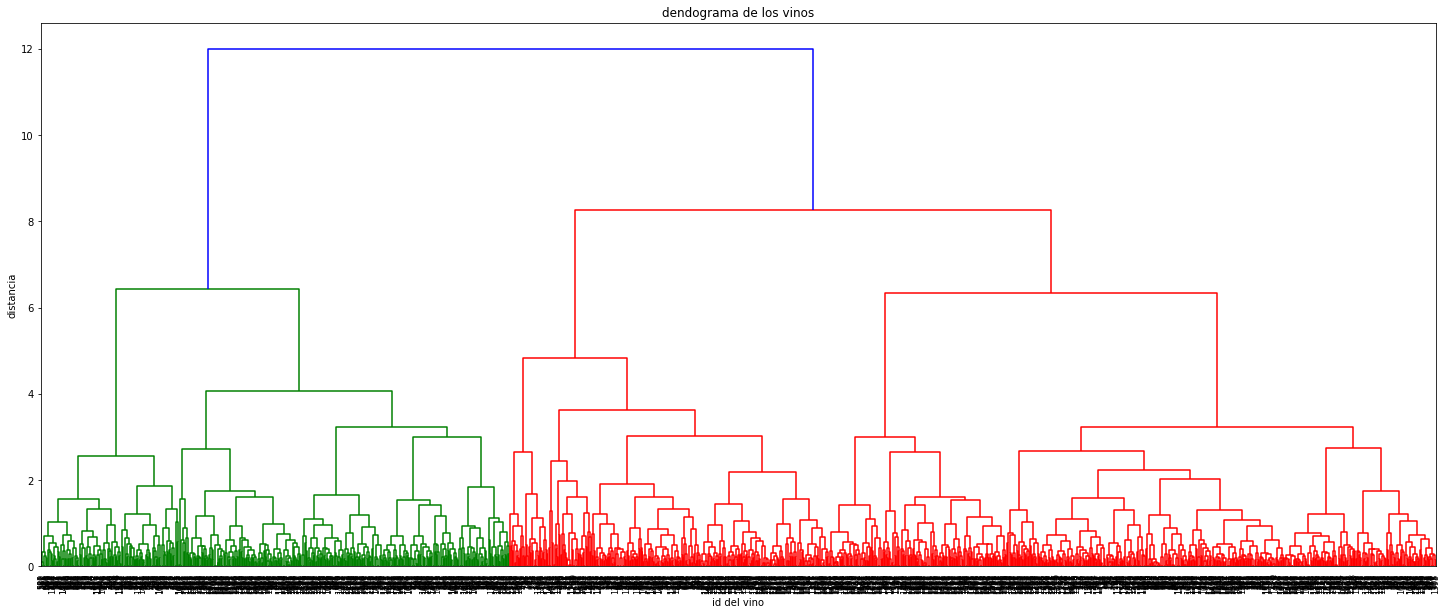

In [16]:
plt.figure(figsize=(25,10))
dendrogram(Z,leaf_rotation=90.0, leaf_font_size=8.0)
plt.title("dendograma de los vinos")
plt.xlabel("id del vino")
plt.ylabel("distancia")

In [17]:
# podemos marcar la distancia, para tener 6 cluster, entre 4 y 6
# si no queremos hacerlo asi, podemos hacer , como vimos antes con kmeans
from sklearn.cluster import KMeans
from sklearn import datasets


model = KMeans(n_clusters=6)
model.fit(df_norma)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
# podemos ver a que clase pertenecen cada vino
from sklearn.cluster import KMeans
model.labels_

array([1, 1, 1, ..., 2, 2, 4])

In [19]:
# ahora podemos incorporar al df los dos resultados , tanto el jeraquico como el de kmeans(no tienen porque coincidir los numeos pero si los clusteres)
nd_k = pd.Series(model.labels_)

df_norma["clus_h"] = nd
df_norma["clus_k"] = nd_k

df_norma.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clus_h,clus_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,5


In [20]:
# tambien podemos ver las cordenadas de los centroides
model.cluster_centers_

array([[0.31721616, 0.27806707, 0.30444795, 0.15215419, 0.12710985,
        0.37934865, 0.29663029, 0.54049528, 0.43607641, 0.17886624,
        0.21328157, 0.45488959],
       [0.26332159, 0.35795984, 0.12196117, 0.09146828, 0.12263805,
        0.14509777, 0.10719407, 0.4903825 , 0.48670591, 0.15508401,
        0.22225044, 0.44116505],
       [0.17476901, 0.32234023, 0.09568282, 0.09362742, 0.09590875,
        0.25057393, 0.12580751, 0.32248507, 0.57761282, 0.18610356,
        0.49077149, 0.61321586],
       [0.32987489, 0.28412848, 0.48758621, 0.07416155, 0.54953658,
        0.21369597, 0.2114049 , 0.51240569, 0.23486288, 0.59281437,
        0.16127321, 0.46896552],
       [0.37144677, 0.15928549, 0.43060606, 0.10720216, 0.1068068 ,
        0.16533291, 0.08425688, 0.41513149, 0.41687545, 0.23741154,
        0.49050117, 0.69772727],
       [0.57844577, 0.20521602, 0.50376518, 0.13132938, 0.12994667,
        0.13480071, 0.09101443, 0.65710702, 0.33274889, 0.22475696,
        0.28344233,

In [21]:
# y para ver el coeficiente para ver la eficicencia del modelo (dividio la distancia )
model.inertia_

186.58822669393612

### interpretacion final
* ahora podemos ver las caracteristicas de cada cluster para poder por ejemplo establecer un precio, o campaña de marketing (ojo¡¡ aqui no tenemos en cuenta la opinion del experto cuando decide la calidad del vino "quality")
* por ejemplo si queremos vender vinos a los paises del norte que lo prefieren con menor acided podemos fijarnos en los datos y seleccinar los que tengan menos valor(ej clulster 3 y 4)
* tambien podemos usar la opinion del experto para establecer una campaña

In [22]:
df_norma.groupby("clus_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clus_h
clus_k,,,,,,,,,,,,,
0,0.317216,0.278067,0.304448,0.152154,0.127110,0.379349,0.296630,0.540495,0.436076,0.178866,0.213282,0.454890,1.050473
1,0.263322,0.357960,0.121961,0.091468,0.122638,0.145098,0.107194,0.490383,0.486706,0.155084,0.222250,0.441165,2.001942
2,0.174769,0.322340,0.095683,0.093627,0.095909,0.250574,0.125808,0.322485,0.577613,0.186104,0.490771,0.613216,3.405286
3,0.329875,0.284128,0.487586,0.074162,0.549537,0.213696,0.211405,0.512406,0.234863,0.592814,0.161273,0.468966,4.896552
4,0.371447,0.159285,0.430606,0.107202,0.106807,0.165333,0.084257,0.415131,0.416875,0.237412,0.490501,0.697727,0.102273
5,0.578446,0.205216,0.503765,0.131329,0.129947,0.134801,0.091014,0.657107,0.332749,0.224757,0.283442,0.544939,2.064777


### Ajustar los parametros del clustering
* metodo del codo
* metodo de la silueta
* estos metodos nos llevan a determinar el numero de cluster que vamos a usar en la segmentacion; tambien es importante la opinion del experto, por ejemplo marketing, que nos podria indicar a priori cuantos segmentos esta buscando

In [23]:
# implementacion del codo y silueta
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples,silhouette_score


In [25]:
# creamos los datos
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
# juntamos toda la informacion, y hacemos reshape para que tenga filas y columnas
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

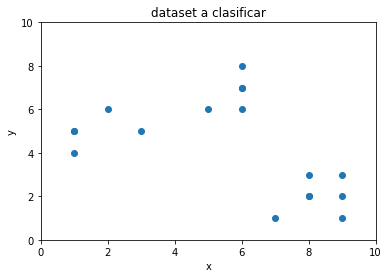

In [26]:
# podemos graficarlo
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

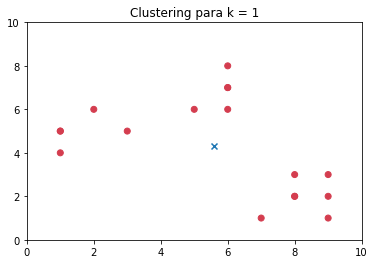

* Para k =  2  el promedio de la silueta es de : 0.6113424368705715
   - Para i =  1  la silueta del cluster vale :  0.7746251901389686
   - Para i =  2  la silueta del cluster vale :  0.49704450958269375


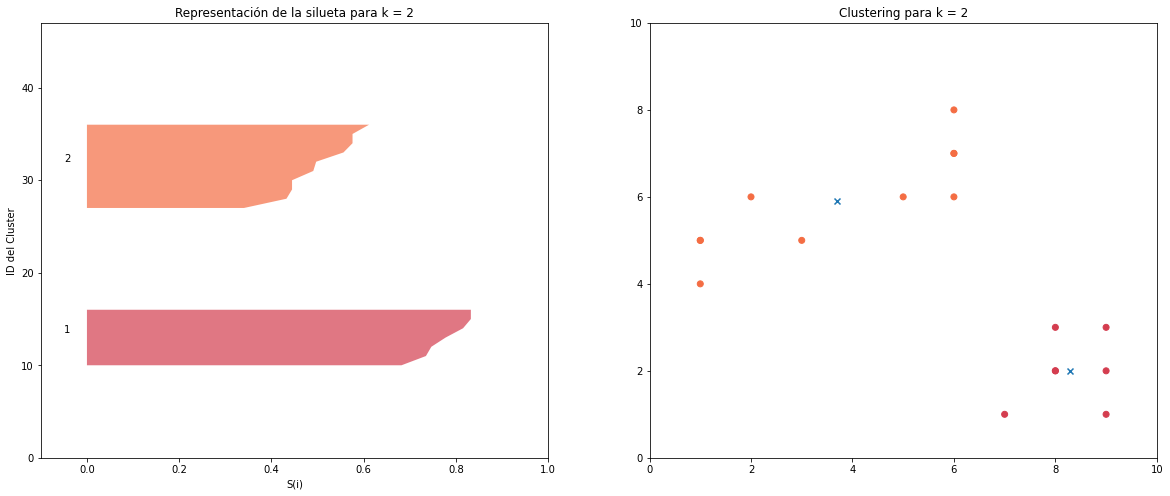

* Para k =  3  el promedio de la silueta es de : 0.7122079383287169
   - Para i =  1  la silueta del cluster vale :  0.7322200728725188
   - Para i =  2  la silueta del cluster vale :  0.7345257364682265
   - Para i =  3  la silueta del cluster vale :  0.6609508863896014


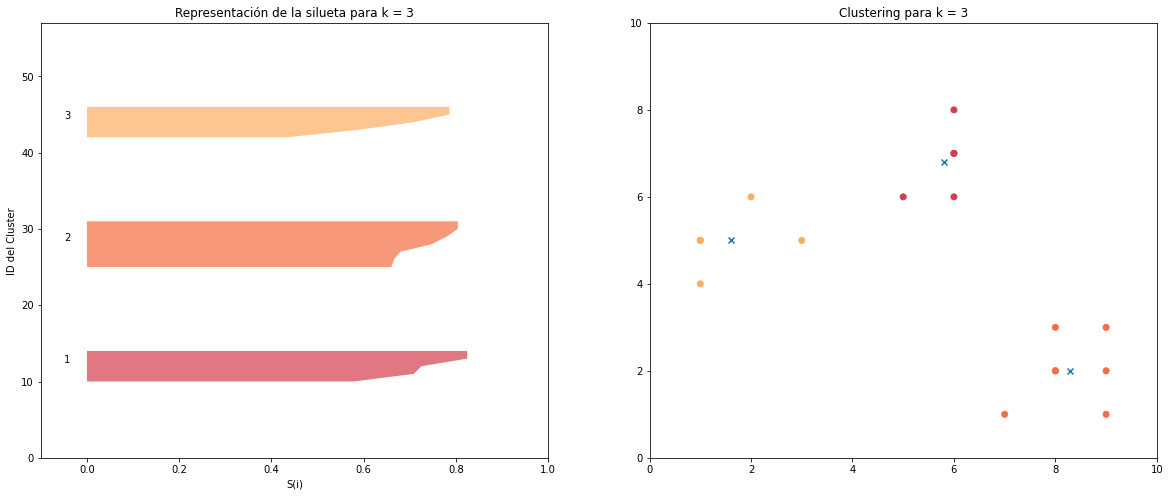

* Para k =  4  el promedio de la silueta es de : 0.6389948643127632
   - Para i =  1  la silueta del cluster vale :  0.24096929517637128
   - Para i =  2  la silueta del cluster vale :  0.7345257364682265
   - Para i =  3  la silueta del cluster vale :  0.654458796162702
   - Para i =  4  la silueta del cluster vale :  0.655666655624379


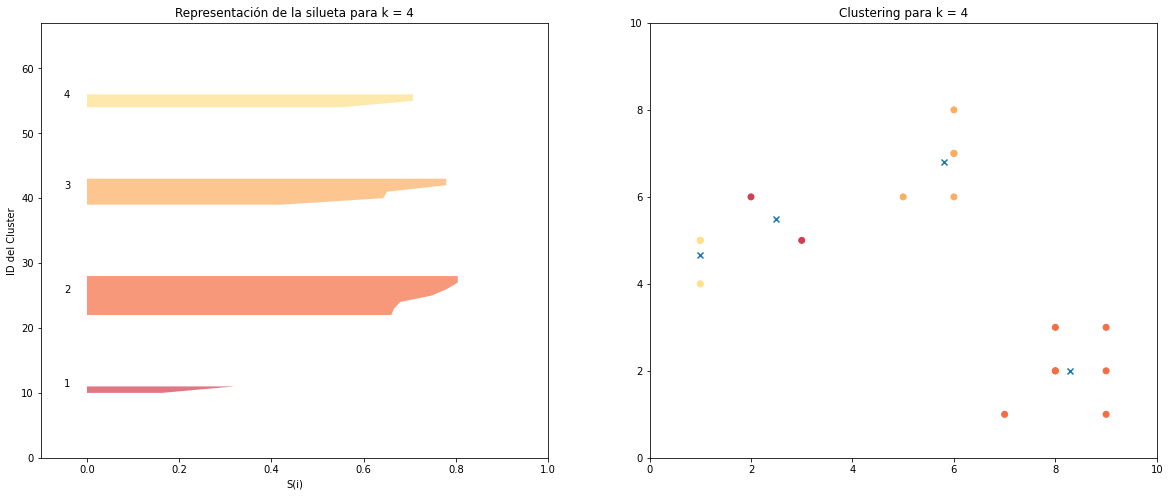

* Para k =  5  el promedio de la silueta es de : 0.46983374375750137
   - Para i =  1  la silueta del cluster vale :  0.24096929517637128
   - Para i =  2  la silueta del cluster vale :  0.37765685097302226
   - Para i =  3  la silueta del cluster vale :  0.654458796162702
   - Para i =  4  la silueta del cluster vale :  0.0
   - Para i =  5  la silueta del cluster vale :  0.655666655624379


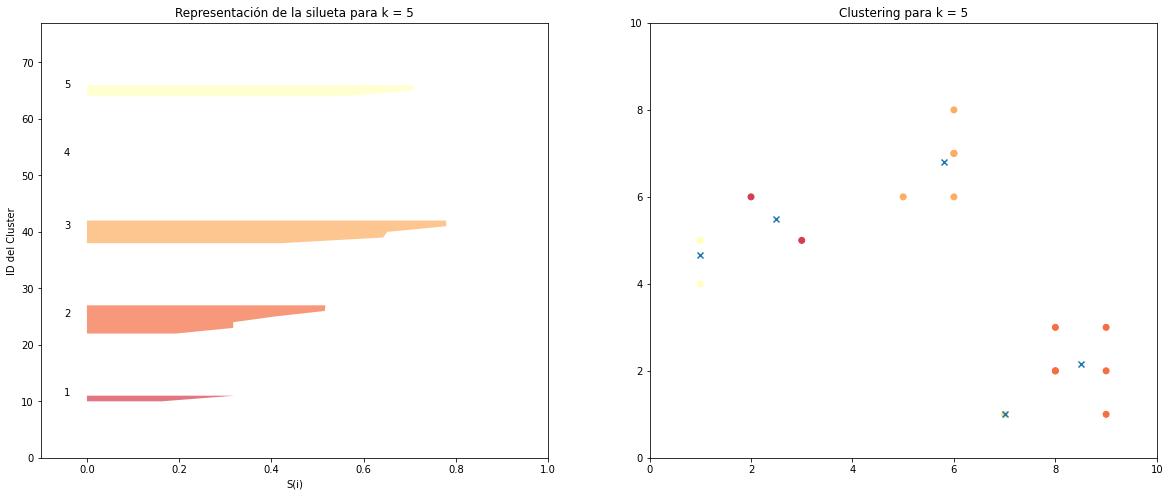

* Para k =  6  el promedio de la silueta es de : 0.4421681922609326
   - Para i =  1  la silueta del cluster vale :  0.31700053499298475
   - Para i =  2  la silueta del cluster vale :  0.24096929517637128
   - Para i =  3  la silueta del cluster vale :  0.654458796162702
   - Para i =  4  la silueta del cluster vale :  0.263812295212263
   - Para i =  5  la silueta del cluster vale :  0.655666655624379
   - Para i =  6  la silueta del cluster vale :  0.0


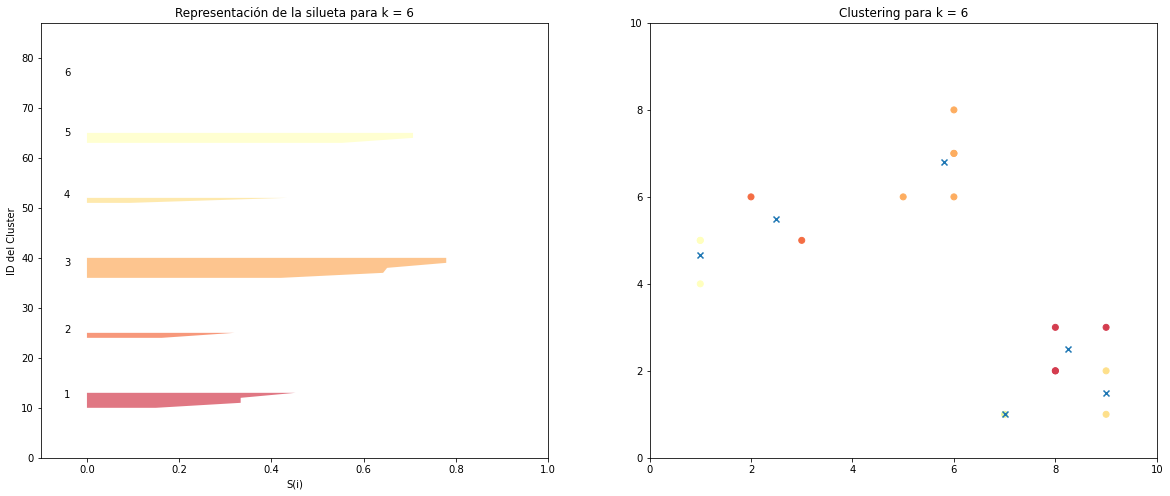

* Para k =  7  el promedio de la silueta es de : 0.37055812537654054
   - Para i =  1  la silueta del cluster vale :  0.14773975649110374
   - Para i =  2  la silueta del cluster vale :  0.32882042637679976
   - Para i =  3  la silueta del cluster vale :  0.24096929517637128
   - Para i =  4  la silueta del cluster vale :  0.0
   - Para i =  5  la silueta del cluster vale :  0.5664789734180768
   - Para i =  6  la silueta del cluster vale :  0.350084177231389
   - Para i =  7  la silueta del cluster vale :  0.655666655624379


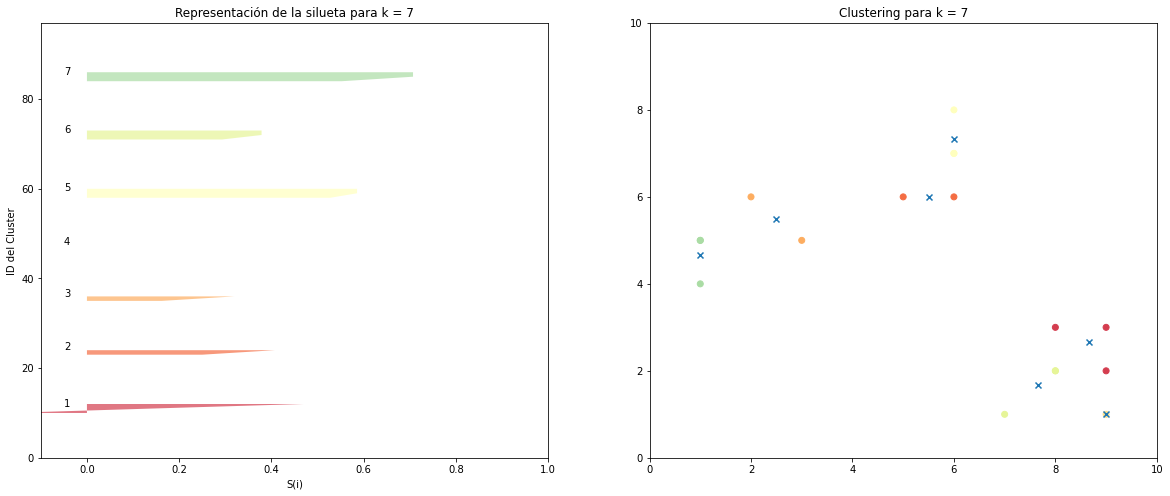

* Para k =  8  el promedio de la silueta es de : 0.35345323083317454
   - Para i =  1  la silueta del cluster vale :  0.32882042637679976
   - Para i =  2  la silueta del cluster vale :  0.30004208861569454
   - Para i =  3  la silueta del cluster vale :  0.6152265411044983
   - Para i =  4  la silueta del cluster vale :  0.0
   - Para i =  5  la silueta del cluster vale :  0.5664789734180768
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.3028895866899326


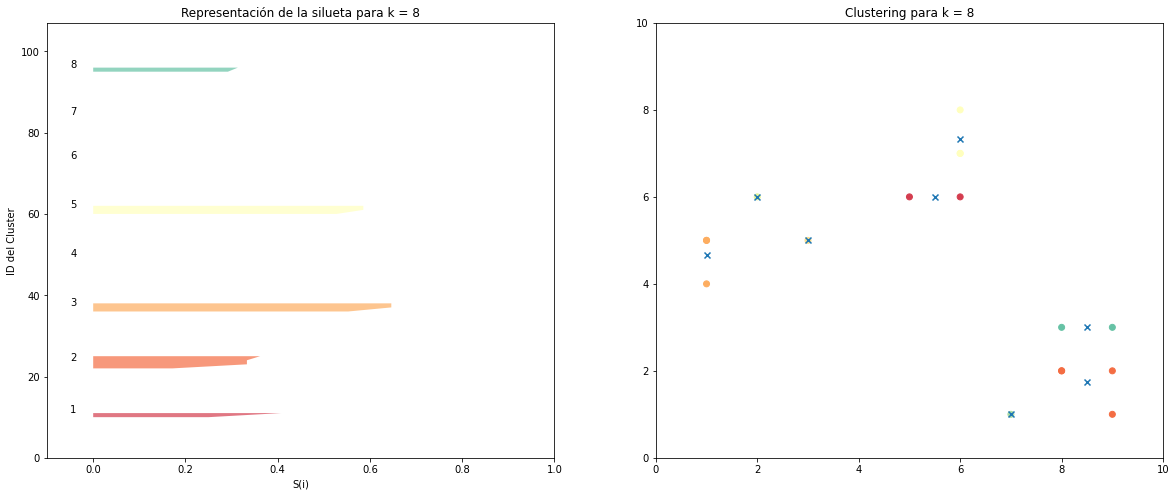

* Para k =  9  el promedio de la silueta es de : 0.39932610787930767
   - Para i =  1  la silueta del cluster vale :  0.14644660940672627
   - Para i =  2  la silueta del cluster vale :  0.6152265411044983
   - Para i =  3  la silueta del cluster vale :  0.5664789734180768
   - Para i =  4  la silueta del cluster vale :  0.14644660940672627
   - Para i =  5  la silueta del cluster vale :  1.0
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.0
   - Para i =  9  la silueta del cluster vale :  0.32882042637679976


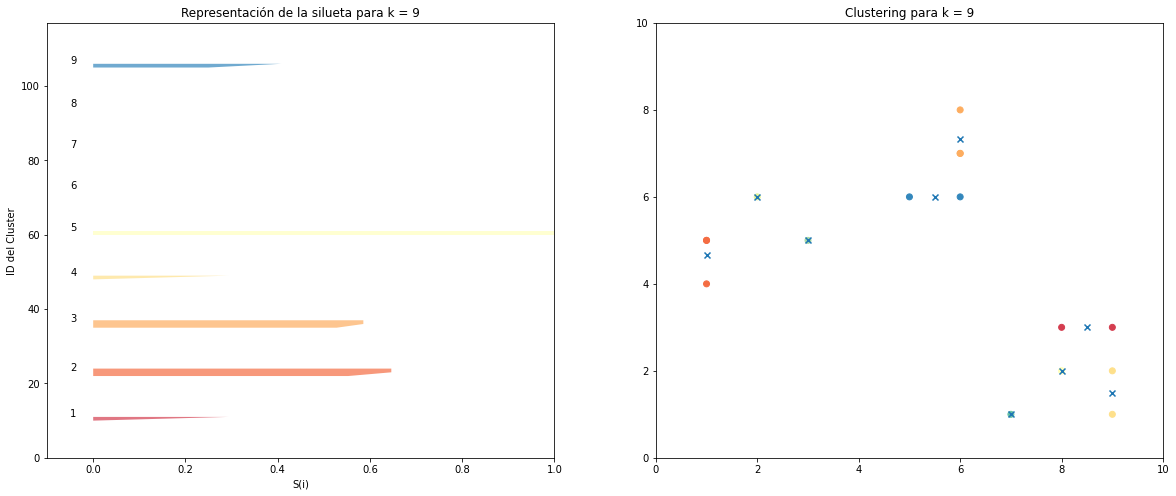

In [36]:
import matplotlib.cm as cm

max_k = 10## maximo número de clusters que vamos a crear
K = range(1,max_k)
ssw = []
cmap = cm.get_cmap("Spectral")
color_palette = [cmap(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ##Fabricaremos una silueta para cada cluster
    # Por seguridad, no hacemos silueta si k = 1 o k = len(X)
    if 1<k<len(X):
       ##Crear un subplot de una fila y dos columnas
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
    
        #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        #El número de clusters a insertar determinará el tamaño de cada barra
        #El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos 
        #entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(X)+ (k+1)*10])
    
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1, " la silueta del cluster vale : ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
        
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2, c=label_color)
    plt.scatter(centers[0], centers[1], marker = "x")
    plt.show()

* con dos cluster las distancias son dispares
* ya con tres se asemejan mucho mas , los valores y sus graficas son mas homogeneas
* con la tecnica del codo, vemos lo mismo, vemos la suma de las distancias para k cluster; vemos que a partir de tres se empieza a ralentizar

Text(0.5, 1.0, 'tecnica del codo para encontrar el k optimo')

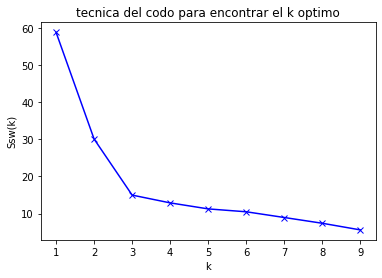

In [40]:
# representacion del codo
plt.plot(K,ssw,"bx-")
plt.xlabel("k")
plt.ylabel("Ssw(k)")
plt.title("tecnica del codo para encontrar el k optimo")

Text(0.5, 1.0, 'tecnica del codo normalizado para encontrar el k optimo')

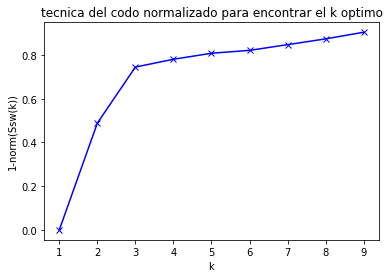

In [41]:
# representacion del codo normalizado
plt.plot(K,1-ssw/sst,"bx-")
plt.xlabel("k")
plt.ylabel("1-norm(Ssw(k))")
plt.title("tecnica del codo normalizado para encontrar el k optimo")

### Practical Implementation of K-means Clustering Algorithm using Python (Banking customer segmentation)

In [2]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import silhouette_score

In [3]:
url = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\german_credit_data.csv"
data = pd.read_csv(url)
data.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education


In [6]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [7]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


The code for EDA (Exploratory Data Analysis) has not been included, EDA was performed on this data, and outlier analysis was done to clean the data and make it fit for our analysis.

As we know that K-means is performed only on the numerical data so we choose the numerical columns for our analysis.

https://www.analyticsvidhya.com/blog/2020/12/a-detailed-introduction-to-k-means-clustering-in-python/

⚠️ Warning!
It’s important to preprocess your data before performing K-Means. You would have to convert your dataset into numerical values if it is not already, so that calculations can be performed. Also, applying feature reduction techniques would speed up the process, and also improve the results. These steps are important to follow because K-Means is sensitive to outliers, just like every other algo that uses average/mean values. Following these steps alleviate these issues.

In [8]:
# kmeans work with numeric data
selected_cols = ["Age","Credit amount","Duration"]
cluster_data = data.loc[:,selected_cols]

Now to perform the k-means clustering as discussed earlier in this article we need to find the value of the ‘k’ number of clusters and we can do that using the following code, here we using several values of k for clustering and then selecting using the Elbow method.

In [12]:
# prepocesing data
from sklearn.preprocessing import StandardScaler
data_norma = StandardScaler().fit_transform(cluster_data.values)
cluster_data_norm = pd.DataFrame(data=data_norma,index=cluster_data.index,columns=cluster_data.columns)

In [13]:
cluster_data_norm.head(3)

,Age,Credit amount,Duration
0,2.766456,-0.745131,-1.236478
1,-1.191404,0.949817,2.248194
2,1.183312,-0.416562,-0.738668


https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a

Text(0.5, 1.0, 'seleccion cluster')

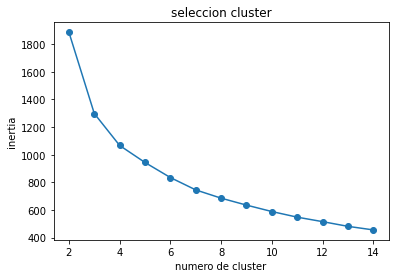

In [14]:
# plotting scree plot to find optimus number of cluster
cluster_range = [*range(2,15)]
inertias = []

for c in cluster_range:
    kmeans = KMeans(init="k-means++",n_clusters=c,n_init=100,random_state=0).fit(cluster_data_norm)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(cluster_range,inertias,marker='o')
plt.xlabel("numero de cluster")
plt.ylabel("inertia")
plt.title("seleccion cluster")


As the number of clusters increases, the variance (within-cluster sum of squares) decreases. The elbow at 3 or 4 clusters represents the most parsimonious balance between minimizing the number of clusters and minimizing the variance within each cluster hence we can choose a value of k to be 3 or 4

Now showing how we can use the Silhouette value Method to find the value of ‘k’.

In [18]:
from sklearn.metrics import silhouette_samples,silhouette_score

results = []
for c in cluster_range:
    clusterer = KMeans(init="k-means++",n_clusters=c,n_init=100,random_state=0).fit(cluster_data_norm)
    cluster_labels = clusterer.fit_predict(cluster_data_norm)
    silhouette_avg = silhouette_score(cluster_data_norm,cluster_labels)
    results.append([c,silhouette_avg])

result = pd.DataFrame(results,columns=["n_clusters","silhouette_score"])
pivot_km = pd.pivot_table(result,index="n_clusters",values="silhouette_score")




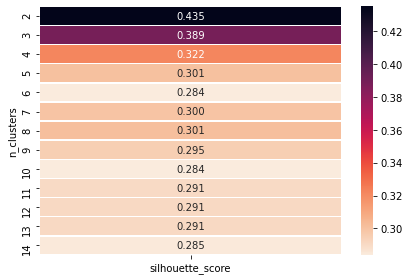

In [22]:
plt.figure()
sns.heatmap(pivot_km,annot=True,linewidths=.5,fmt=".3f",cmap=sns.cm.rocket_r)
plt.tight_layout()

In [23]:
# Now, fitting the k means algorithm using the value of k=3 and plotting heatmap for the clusters.
k_mean_sel = KMeans(init="k-means++",n_clusters=3,n_init=100,random_state=0).fit(cluster_data_norm)
labels = pd.DataFrame(k_mean_sel.labels_)

In [25]:
labels[:5]

,0
0,2
1,0
2,2
3,0
4,2


In [27]:
cluster_data

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


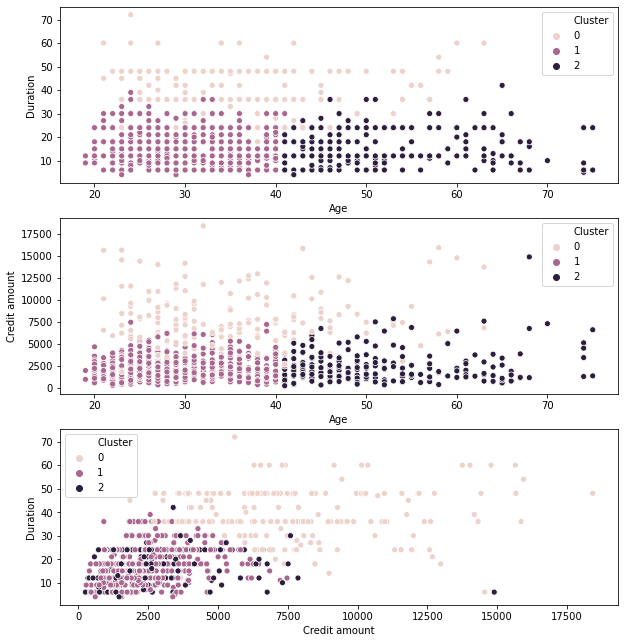

In [45]:
# Assign new columns to a DataFrame.
clustered_data = cluster_data.assign(Cluster=labels)


comb = combinations(cluster_data.columns.values.tolist(),2)
fig,ax = plt.subplots(3,1,figsize=(10,11))
sns.scatterplot(x="Age",y="Duration",data=clustered_data,hue="Cluster",ax=ax[0])
sns.scatterplot(x="Age",y="Credit amount",data=clustered_data,hue="Cluster",ax=ax[1])
sns.scatterplot(x="Credit amount",y="Duration",data=clustered_data,hue="Cluster",ax=ax[2])

In [47]:
# heatmap for interpreation
grouped_km = clustered_data.groupby(["Cluster"]).mean().round(1)
grouped_km.sort_values(by="Age")

,Age,Credit amount,Duration
Cluster,,,
1,29.7,2207.5,16.9
0,34.8,7609.6,39.3
2,51.7,2398.5,15.8
